In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [4]:
pd.set_option('display.max_columns',20,'display.width',1000)
train = pd.read_csv("C:\\Users\\ratri\\OneDrive\\图片\\train.csv")
test = pd.read_csv("C:\\Users\\ratri\\OneDrive\\图片\\test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [23]:
train.groupby('Survived').mean('Survived')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [28]:
train.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
..           ...       ...     .

In [29]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [31]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


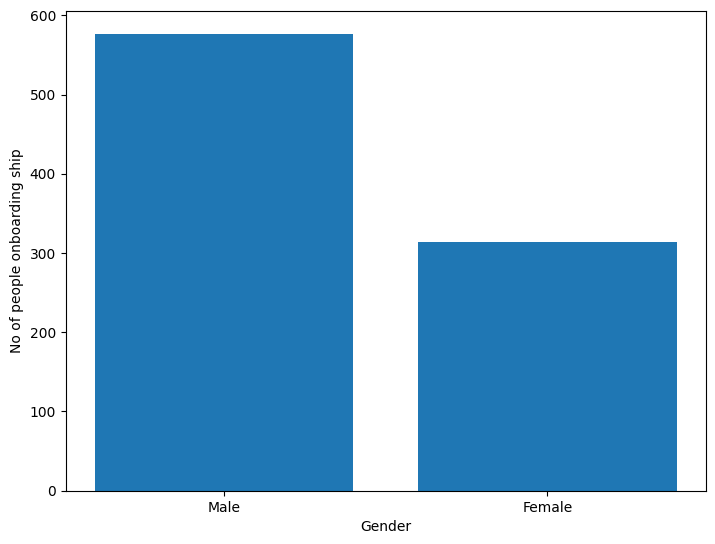

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index =[577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [34]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [35]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


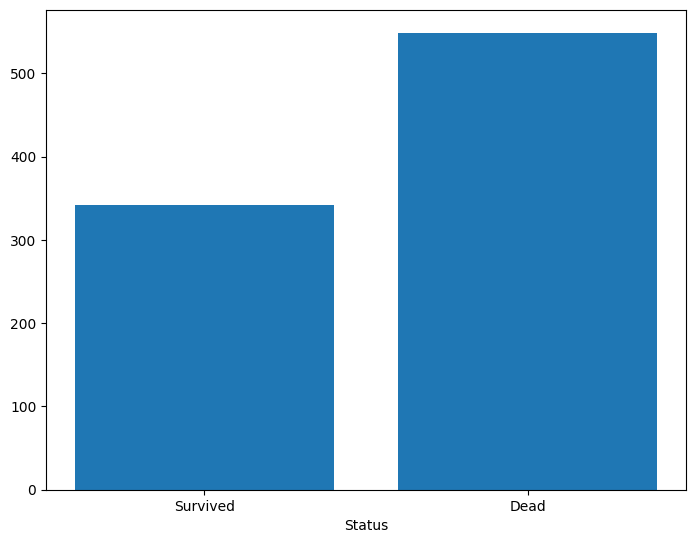

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, 'BAR GRAP OF PEOPLE ACCORDING TO TICKET CLASS IN WHICH PEOPLE COULDNOT SURVIVED')

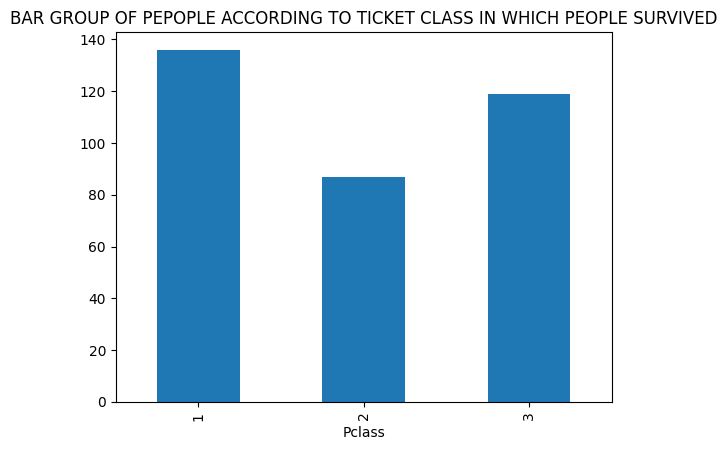

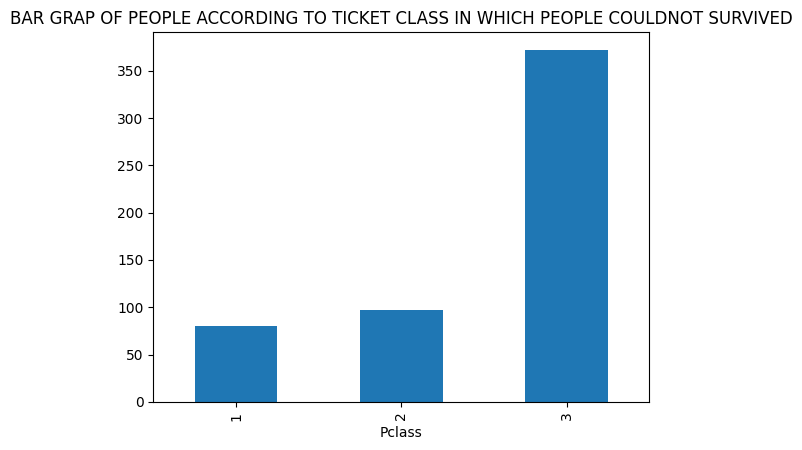

In [38]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('BAR GROUP OF PEPOPLE ACCORDING TO TICKET CLASS IN WHICH PEOPLE SURVIVED')

plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('BAR GRAP OF PEOPLE ACCORDING TO TICKET CLASS IN WHICH PEOPLE COULDNOT SURVIVED')

([<matplotlib.axis.XTick at 0x16b6e1af140>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

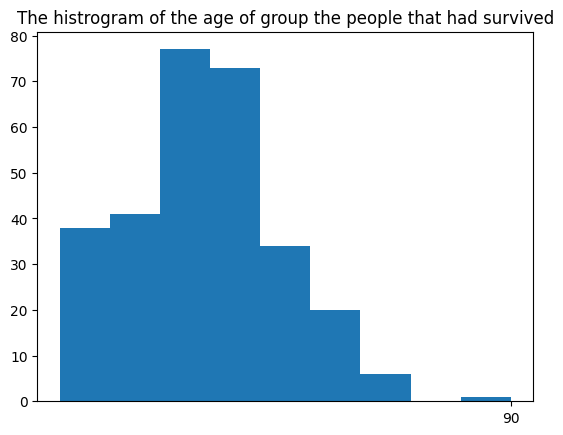

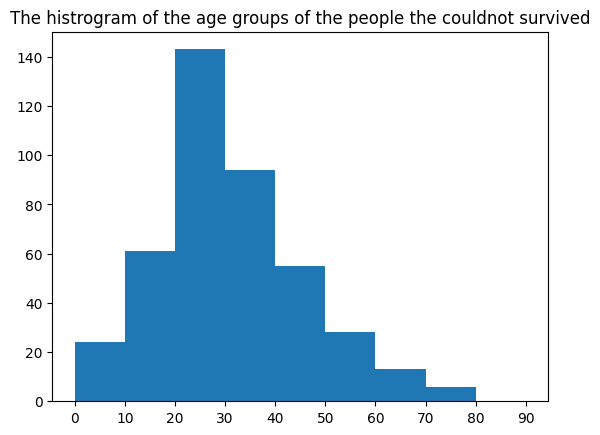

In [44]:
plt.figure(1)
age = train.loc[train.Survived == 1, 'Age']
plt.title('The histrogram of the age of group the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(90,100,10))

plt.figure(2)
age = train.loc[train.Survived == 0, 'Age']
plt.title('The histrogram of the age groups of the people the couldnot survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [47]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [48]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [51]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by= 'Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


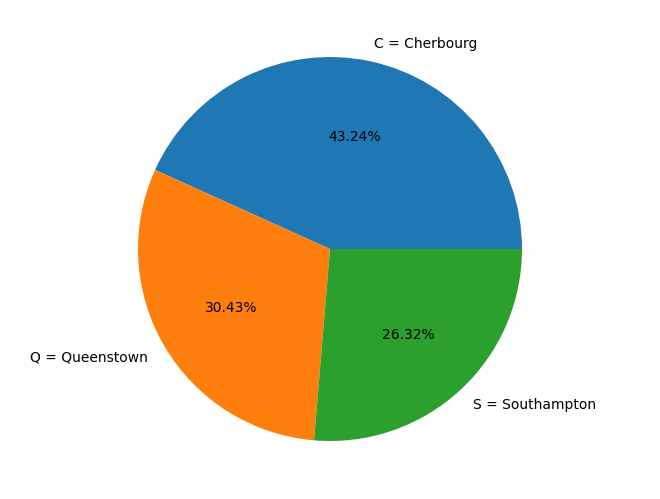

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l =['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s =[0.553571,0.389610,0.336957]
ax.pie(s, labels =l,autopct='%1.2f%%')
plt.show()

In [55]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis= 1)

In [56]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [57]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [70]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']

x=train[column_train]

y=train['Survived']

In [72]:
x['Age'].isnull().sum()
x['Pclass'].isnull().sum()
x['SibSp'].isnull().sum()
x['Parch'].isnull().sum()
x['Fare'].isnull().sum()
x['Sex'].isnull().sum()
x['Embarked'].isnull().sum()

2

In [73]:
x['Age']=x['Age'].fillna(x['Age'].median())
x['Age'].isnull().sum()

0

In [74]:
x['Embarked'] = train['Embarked'].fillna(method = 'pad')
x['Embarked'].isnull().sum()

0

In [79]:
d={'male':0, 'female':1}
x['Sex']=x['Sex'].apply(lambda x:d[x])
x['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [81]:
f={'C':0, 'Q':1, 'S':2}
x['Embarked']=x['Embarked'].apply(lambda x:f[x])
x['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))


Accuracy Score: 0.7574626865671642


In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [101]:
from sklearn.svm import SVC
model1 =SVC()
model1.fit(X_train,Y_train)

pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=" ,accuracy_score(Y_test,pred_y))

Acc= 0.7574626865671642


In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[130  26]
 [ 39  73]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       156
           1       0.74      0.65      0.69       112

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [107]:
from sklearn.neighbors import KNeighborsClassifier
model2 =KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6604477611940298


In [108]:
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [115]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [116]:
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [119]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358


In [120]:
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [123]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','Naive Bayes','KNN','Decision Tree'],
    'Score':[0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
